In [3]:
import pandas as pd
import numpy as np

# Load Boston Housing dataset from original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Extract features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
X = pd.DataFrame(data, columns=column_names)
y = pd.Series(target, name="PRICE")


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anees\AppData\Local\Temp\ipykernel_29704\3391825624.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [4]:
import pandas as pd
import numpy as np

# ✅ Load Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)  # <- FIXED here using raw string

# ✅ Extract features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# ✅ Create DataFrame
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
X = pd.DataFrame(data, columns=column_names)
y = pd.Series(target, name="PRICE")

# ✅ Optional: Combine into one DataFrame for easy viewing
df = pd.concat([X, y], axis=1)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Step 1: Normalize all features (except 'CHAS', which is categorical)

from copy import deepcopy

# Make a deep copy so we keep original data safe
X_processed = deepcopy(X)

# CHAS is a categorical binary feature (0 or 1), so we exclude it from normalization
numerical_cols = X.columns.difference(['CHAS'])

# Min-Max Normalization (scales values between 0 and 1)
for col in numerical_cols:
    min_val = X[col].min()
    max_val = X[col].max()
    X_processed[col] = (X[col] - min_val) / (max_val - min_val)

# Check the result
X_processed.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [6]:
# Step 1: Add bias (intercept) term
X_np = X_processed.to_numpy()
X_np = np.c_[np.ones(X_np.shape[0]), X_np]  # Add column of 1s

# Step 2: Convert y to NumPy array
y_np = y.to_numpy().reshape(-1, 1)

# Step 3: Calculate weights using the Normal Equation
# w = (XᵀX)^(-1) Xᵀy
weights = np.linalg.inv(X_np.T @ X_np) @ X_np.T @ y_np

# Step 4: Make predictions
y_pred = X_np @ weights


In [7]:
# RMSE
rmse = np.sqrt(np.mean((y_np - y_pred) ** 2))

# R² Score
ss_total = np.sum((y_np - np.mean(y_np)) ** 2)
ss_res = np.sum((y_np - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print(f"Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Linear Regression Results:
RMSE: 4.68
R²: 0.74


In [8]:
import random

class RandomForestSimple:
    def __init__(self, n_trees=5):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            # Random sample of data (bootstrapping)
            idxs = np.random.choice(len(X), len(X), replace=True)
            X_sample = X.iloc[idxs]
            y_sample = y.iloc[idxs]

            # Pick a random feature
            feature = random.choice(X.columns)
            threshold = X_sample[feature].median()

            # Split the data based on the threshold
            left_mean = y_sample[X_sample[feature] <= threshold].mean()
            right_mean = y_sample[X_sample[feature] > threshold].mean()

            # Save tree rules
            self.trees.append((feature, threshold, left_mean, right_mean))

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            tree_preds = []
            for feature, threshold, left_mean, right_mean in self.trees:
                if row[feature] <= threshold:
                    tree_preds.append(left_mean)
                else:
                    tree_preds.append(right_mean)
            predictions.append(np.mean(tree_preds))
        return np.array(predictions)


In [10]:
# Assuming X is your feature DataFrame
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [12]:
rf_model = RandomForestSimple(n_trees=5)
rf_model.fit(X_norm, y)
y_pred_rf = rf_model.predict(X_norm)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")


In [15]:
evaluate(y, y_pred_rf, "Random Forest (Simple)")


Random Forest (Simple) Results:
RMSE: 8.08
R²: 0.23


In [16]:
import matplotlib.pyplot as plt

# Count feature usage
feature_counts = {}
for tree in rf_model.trees:
    for split in tree['splits']:
        feature = split['feature']
        if feature in feature_counts:
            feature_counts[feature] += 1
        else:
            feature_counts[feature] = 1

# Normalize counts
total_splits = sum(feature_counts.values())
feature_importance = {k: v / total_splits for k, v in feature_counts.items()}

# Sort by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Plot
plt.figure(figsize=(10, 5))
plt.bar([f[0] for f in sorted_features], [f[1] for f in sorted_features])
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest - Simple)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


TypeError: tuple indices must be integers or slices, not str

In [17]:
rf_model.trees[0]


('RAD',
 0.17391304347826086,
 np.float64(24.002201257861635),
 np.float64(20.193617021276594))

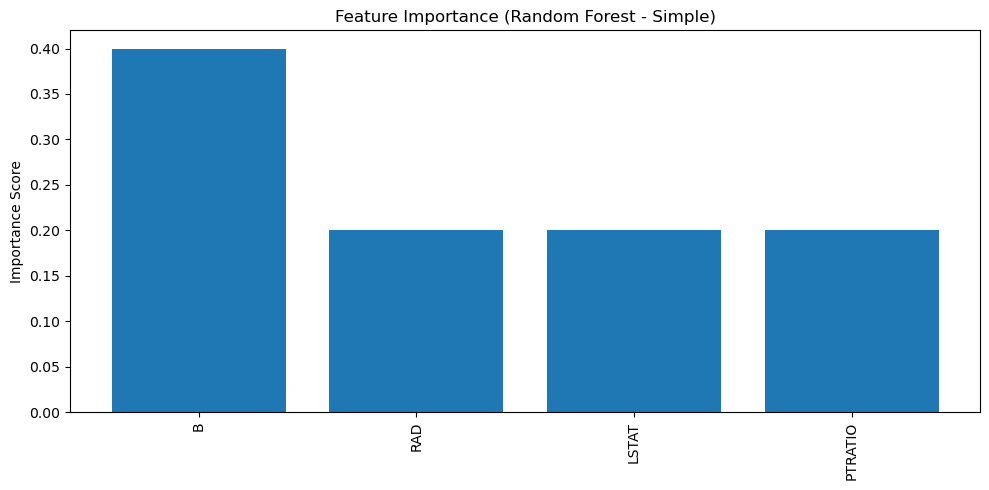

In [18]:
import matplotlib.pyplot as plt

# Count feature usage
feature_counts = {}
for tree in rf_model.trees:
    feature = tree[0]  # the feature name used for the split
    if feature in feature_counts:
        feature_counts[feature] += 1
    else:
        feature_counts[feature] = 1

# Normalize counts
total_splits = sum(feature_counts.values())
feature_importance = {k: v / total_splits for k, v in feature_counts.items()}

# Sort and plot
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 5))
plt.bar([f[0] for f in sorted_features], [f[1] for f in sorted_features])
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest - Simple)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
